# M061 Reports

In [5]:
%load_ext autoreload
%autoreload 2

import os
import sys
sys.path.append("../../")

import pyaldata as pyal
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from tools.reports.report_initial import run_initial_report
from tools.params import Params, colors
from tools.dsp.preprocessing import preprocess
import tools.viz.mean_firing as firing
import tools.viz.dimensionality as dim
import tools.viz.utilityTools as vizutils
import tools.decoding.rrr as rrr
import tools.decoding.decodeTools as decutils
import tools.dataTools as dt




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 4th March 10:00h

In [ ]:
# Files 
data_dir = "/data/bnd-data/raw/M061/M061_2025_03_04_10_00"
fname0 = os.path.join(data_dir, "M061_2025_03_04_10_00_pyaldata_0.mat")
fname1 = os.path.join(data_dir, "M061_2025_03_04_10_00_pyaldata_1.mat")
fname2 = os.path.join(data_dir, "M061_2025_03_04_10_00_pyaldata_2.mat")


# Load files
df0 = pyal.mat2dataframe(fname0, shift_idx_fields=False)
df1 = pyal.mat2dataframe(fname1, shift_idx_fields=False)
df2 = pyal.mat2dataframe(fname2, shift_idx_fields=False)

df = pd.concat([df0, df1, df2], ignore_index=True)

del df0
del df1
del df2

df_ = preprocess(df, only_trials=False, repair_time_varying_fields=['MotSen1_X', 'MotSen1_Y'])


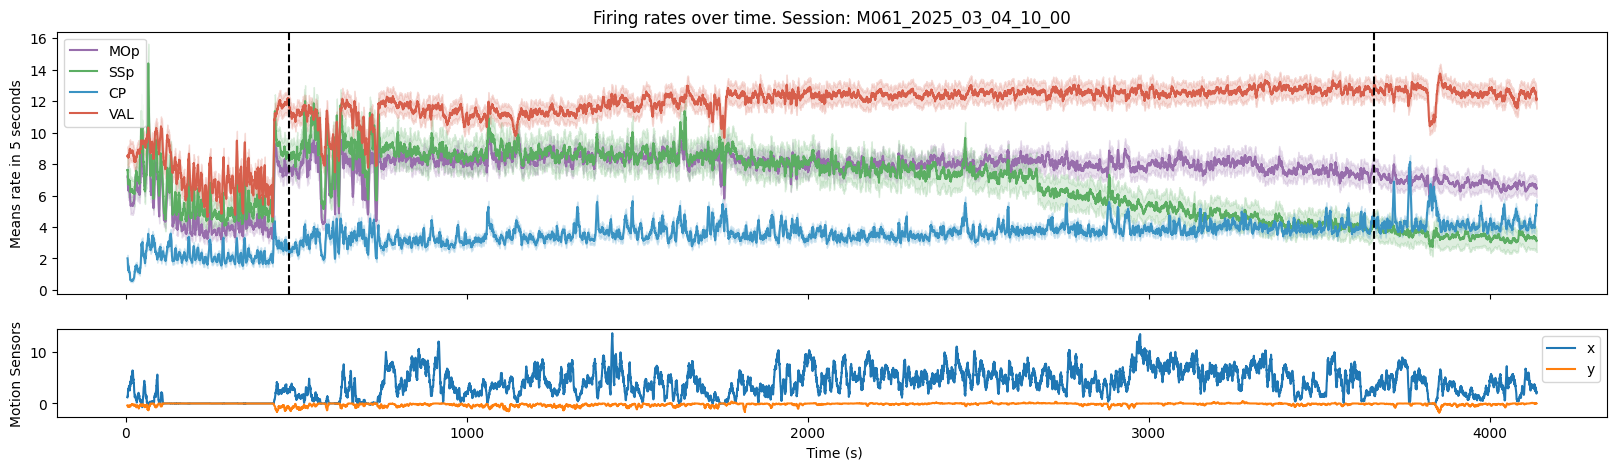

In [7]:
from scipy import stats
from tools import params
from tools.dsp.utils import moving_window_mean
from tools.viz.utilityTools import shaded_errorbar

window = 5  # in seconds
session = 'M061_2025_03_04_10_00'

fig, ax = plt.subplots(2, 1, figsize=(20, 5), sharex='all', gridspec_kw={'height_ratios': [3, 1]})
areas=["MOp", "SSp", "CP", "VAL"]


for area in areas:
    all_rates = np.concatenate(df_[f"{area}_rates"].values, axis=0)
    means, time_bins = moving_window_mean(all_rates, int(window / Params.BIN_SIZE))
    shaded_errorbar(ax[0], x=time_bins * Params.BIN_SIZE, y=means, errorStat=stats.sem, 
                    color=getattr(params.colors, f"{area}_light", "k"),
                    label=area
                    )
    
all_motion_sensor_x = np.concatenate(df_[f"values_MotSen1_X"].values, axis=0)
all_motion_sensor_y = np.concatenate(df_[f"values_MotSen1_Y"].values, axis=0)

motion_sensor_means_x, _ = moving_window_mean(all_motion_sensor_x, int(window / Params.BIN_SIZE))
motion_sensor_means_y, _ = moving_window_mean(all_motion_sensor_y, int(window / Params.BIN_SIZE))

ax[1].plot(time_bins * Params.BIN_SIZE, motion_sensor_means_x, label='x')
ax[1].plot(time_bins * Params.BIN_SIZE, motion_sensor_means_y, label='y')
ax[1].set_ylabel(f'Motion Sensors')
ax[1].legend()


ax[0].set_ylabel(f'Means rate in {window} seconds')
ax[1].set_xlabel(f' Time (s)')
ax[0].axvline(x=480, color="k", linestyle="--")
ax[0].axvline(x=3660, color="k", linestyle="--")
ax[0].set_title(f'Firing rates over time. Session: {session}')
ax[0].legend()


field values_before_camera_trigger could not be converted to int.
field idx_before_camera_trigger could not be converted to int.
array field VAL_KSLabel could not be converted to int.
array field SSp_KSLabel could not be converted to int.
array field all_KSLabel could not be converted to int.
array field CP_KSLabel could not be converted to int.
array field MOp_KSLabel could not be converted to int.
array field GPe_KSLabel could not be converted to int.
field idx_motion could not be converted to int.
array field VAL_KSLabel could not be converted to int.
array field SSp_KSLabel could not be converted to int.
array field all_KSLabel could not be converted to int.
array field CP_KSLabel could not be converted to int.
array field MOp_KSLabel could not be converted to int.
array field GPe_KSLabel could not be converted to int.
field values_Sol_direction could not be converted to int.
field idx_Sol_direction could not be converted to int.
field values_Sol_duration could not be converted to 

/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.12/src/PyalData/pyaldata/utils.py:155: UserWarning: values_MotSen1_X might be a time-varying field. It matches the length of VAL_spikes on 99.8529411764706% of trials
  warnings.warn(
/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.12/src/PyalData/pyaldata/utils.py:155: UserWarning: idx_MotSen1_X might be a time-varying field. It matches the length of VAL_spikes on 99.8529411764706% of trials
  warnings.warn(
/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.12/src/PyalData/pyaldata/utils.py:155: UserWarning: values_MotSen1_Y might be a time-varying field. It matches the length of VAL_spikes on 99.8529411764706% of trials
  warnings.warn(
/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.12/src/PyalData/pyaldata/utils.py:155: UserWarning: idx_MotSen1_Y might be a time-varying field. It matches the length of VAL_spikes on 99.8529411764706% of trials

Combined every 3 bins
Resulting VAL_spikes ephys data shape is (NxT): (240, 20000)
Resulting SSp_spikes ephys data shape is (NxT): (59, 20000)
Resulting all_spikes ephys data shape is (NxT): (53, 20000)
Resulting CP_spikes ephys data shape is (NxT): (225, 20000)
Resulting MOp_spikes ephys data shape is (NxT): (206, 20000)
Resulting GPe_spikes ephys data shape is (NxT): (112, 20000)


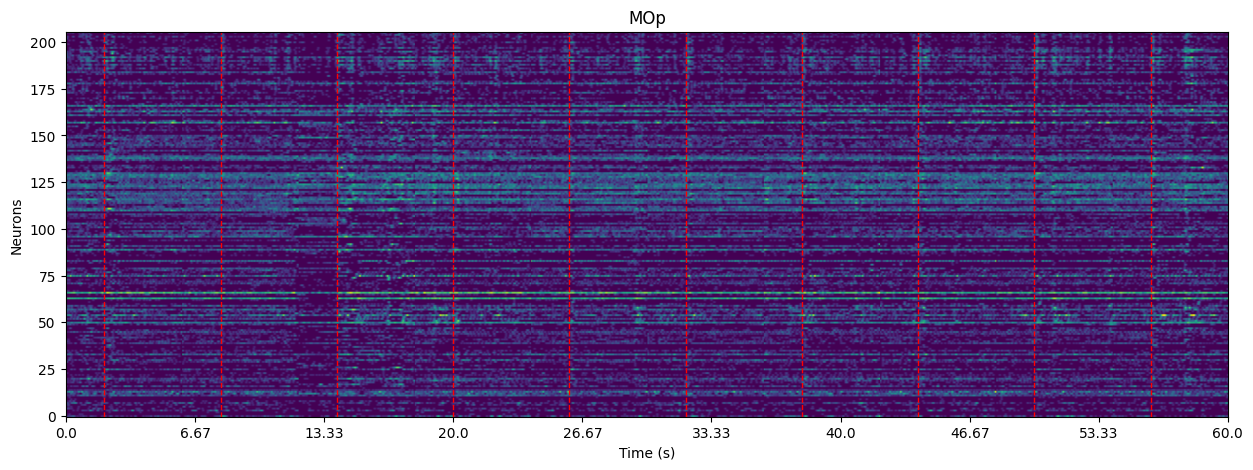

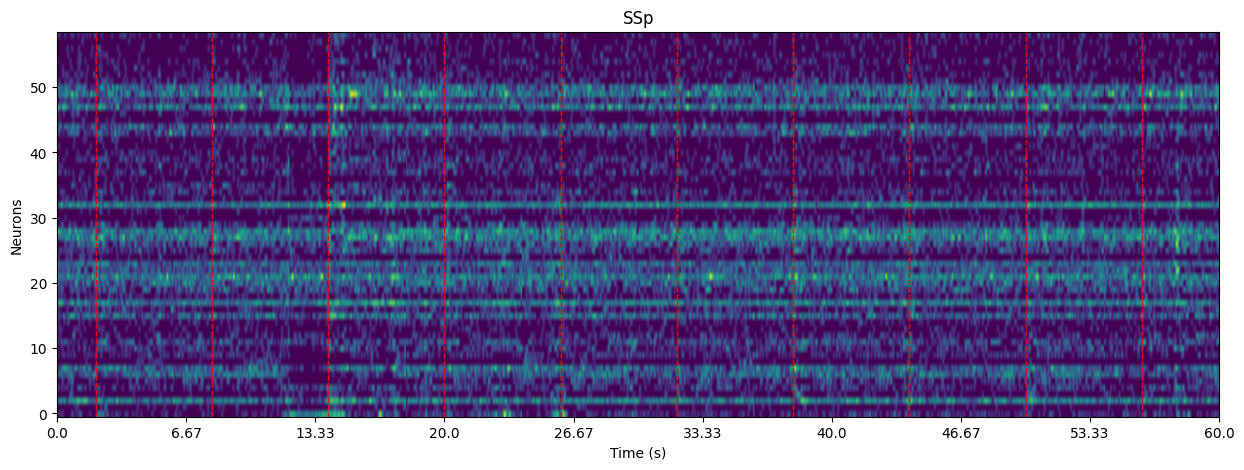

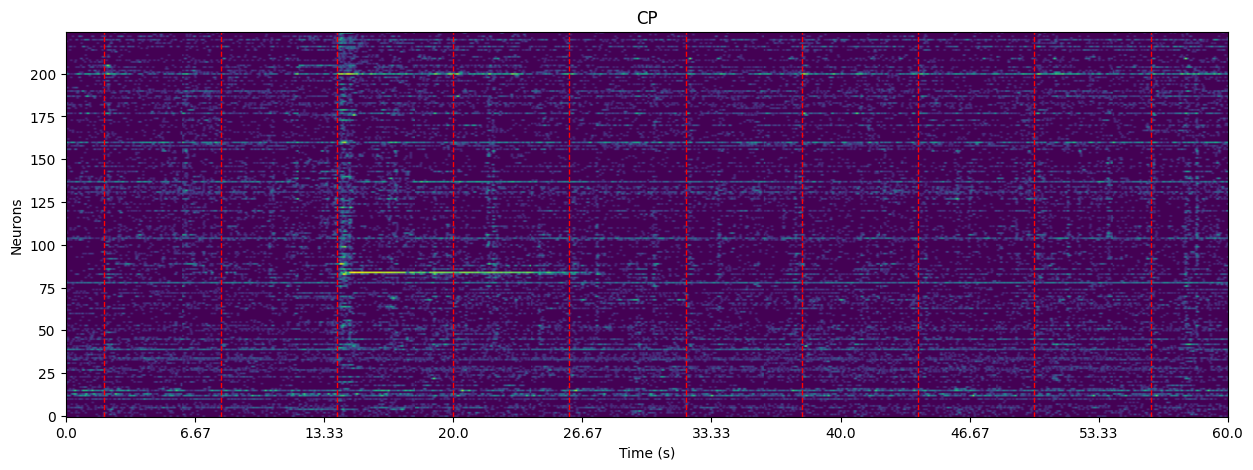

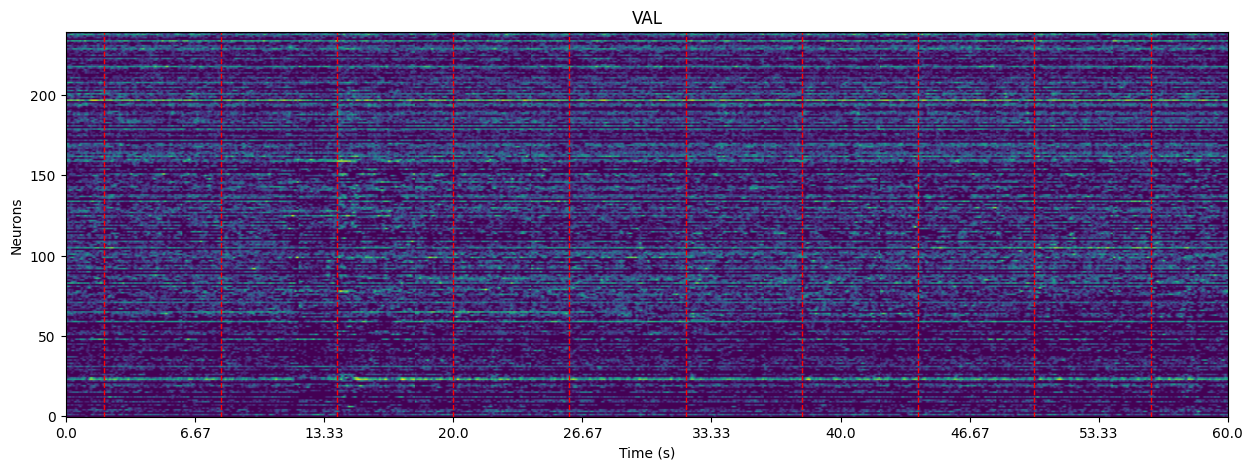

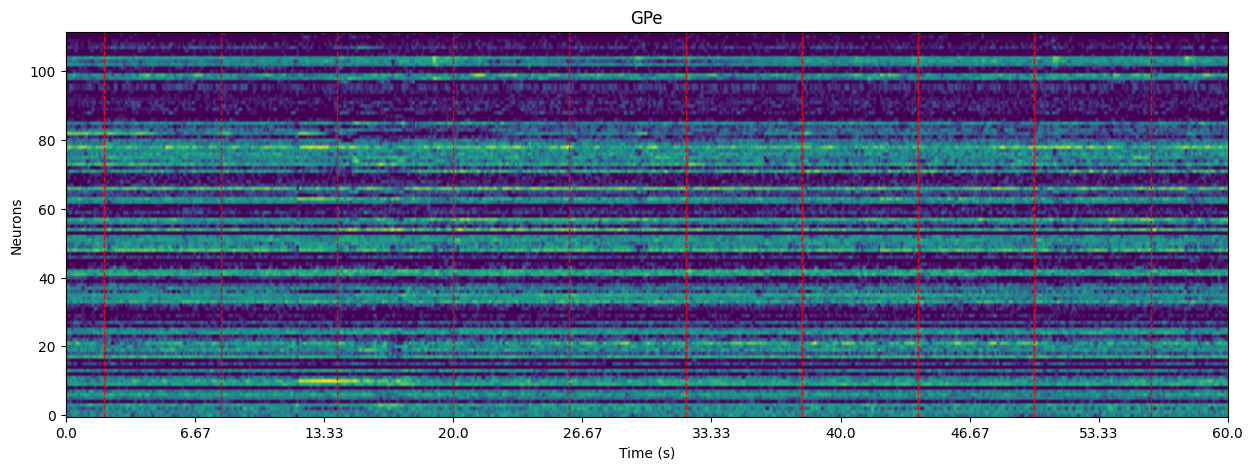

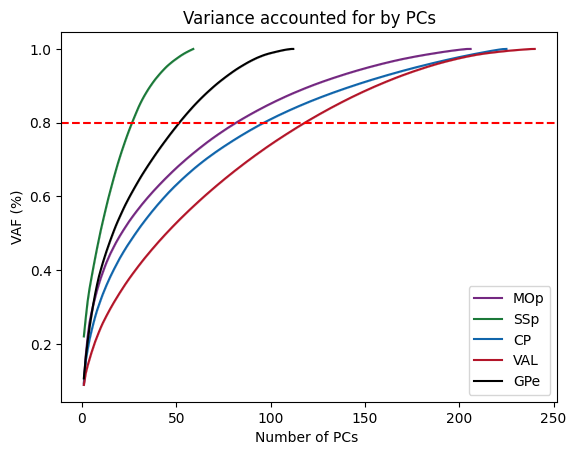

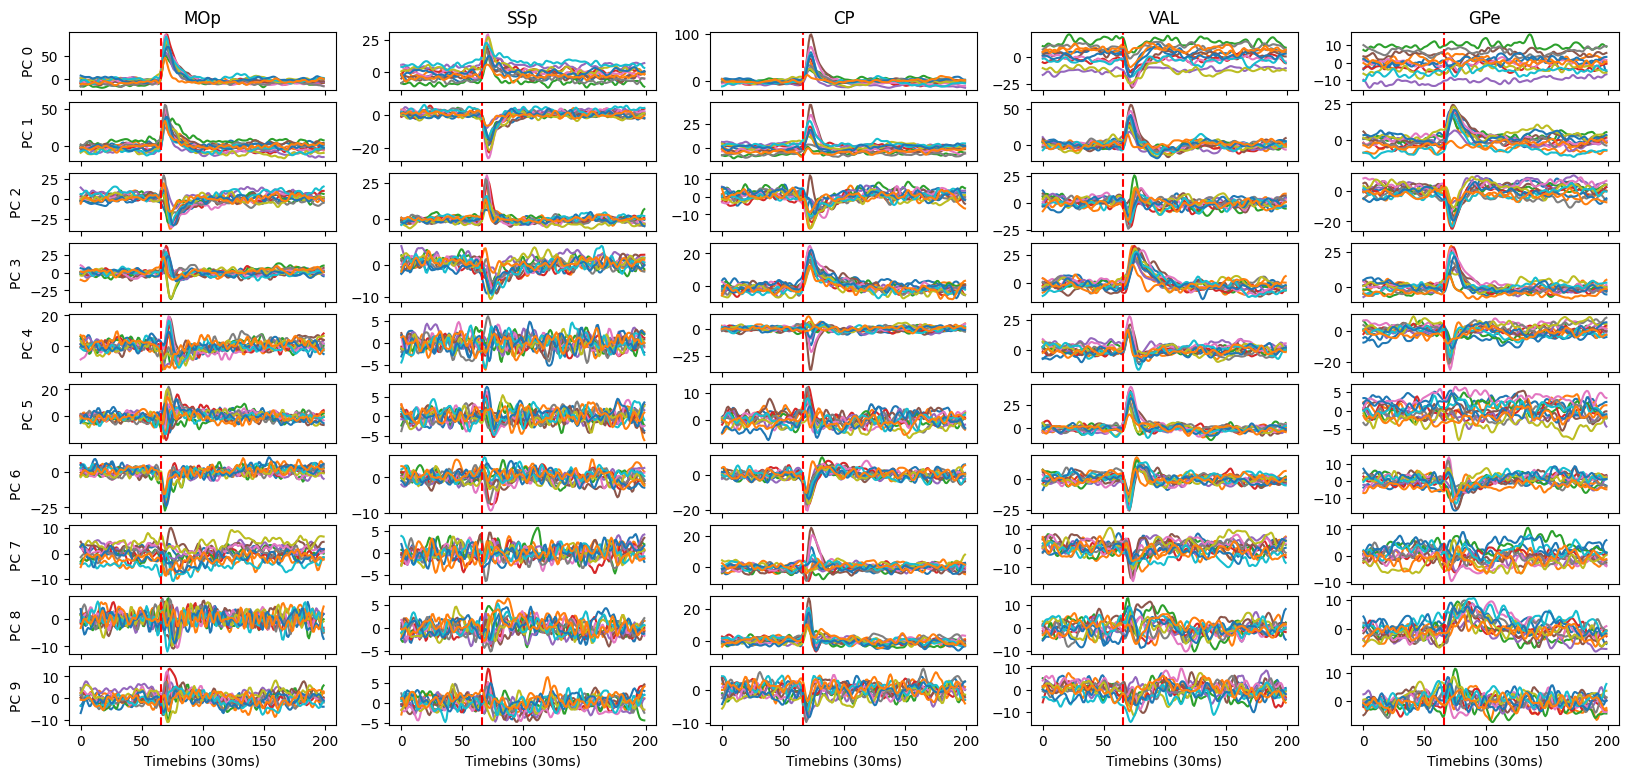

In [ ]:



run_initial_report(df, areas=["MOp", "SSp", "CP", "VAL", "GPe"])

In [5]:
from tools.dsp.preprocessing import preprocess


df_ = preprocess(df)

/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.12/src/PyalData/pyaldata/utils.py:155: UserWarning: values_MotSen1_X might be a time-varying field. It matches the length of VAL_spikes on 99.8529411764706% of trials
  warnings.warn(
/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.12/src/PyalData/pyaldata/utils.py:155: UserWarning: idx_MotSen1_X might be a time-varying field. It matches the length of VAL_spikes on 99.8529411764706% of trials
  warnings.warn(
/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.12/src/PyalData/pyaldata/utils.py:155: UserWarning: values_MotSen1_Y might be a time-varying field. It matches the length of VAL_spikes on 99.8529411764706% of trials
  warnings.warn(
/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.12/src/PyalData/pyaldata/utils.py:155: UserWarning: idx_MotSen1_Y might be a time-varying field. It matches the length of VAL_spikes on 99.8529411764706% of trials

Combined every 3 bins
Resulting VAL_spikes ephys data shape is (NxT): (240, 200)
Resulting SSp_spikes ephys data shape is (NxT): (59, 200)
Resulting all_spikes ephys data shape is (NxT): (53, 200)
Resulting CP_spikes ephys data shape is (NxT): (225, 200)
Resulting MOp_spikes ephys data shape is (NxT): (206, 200)
Resulting GPe_spikes ephys data shape is (NxT): (112, 200)


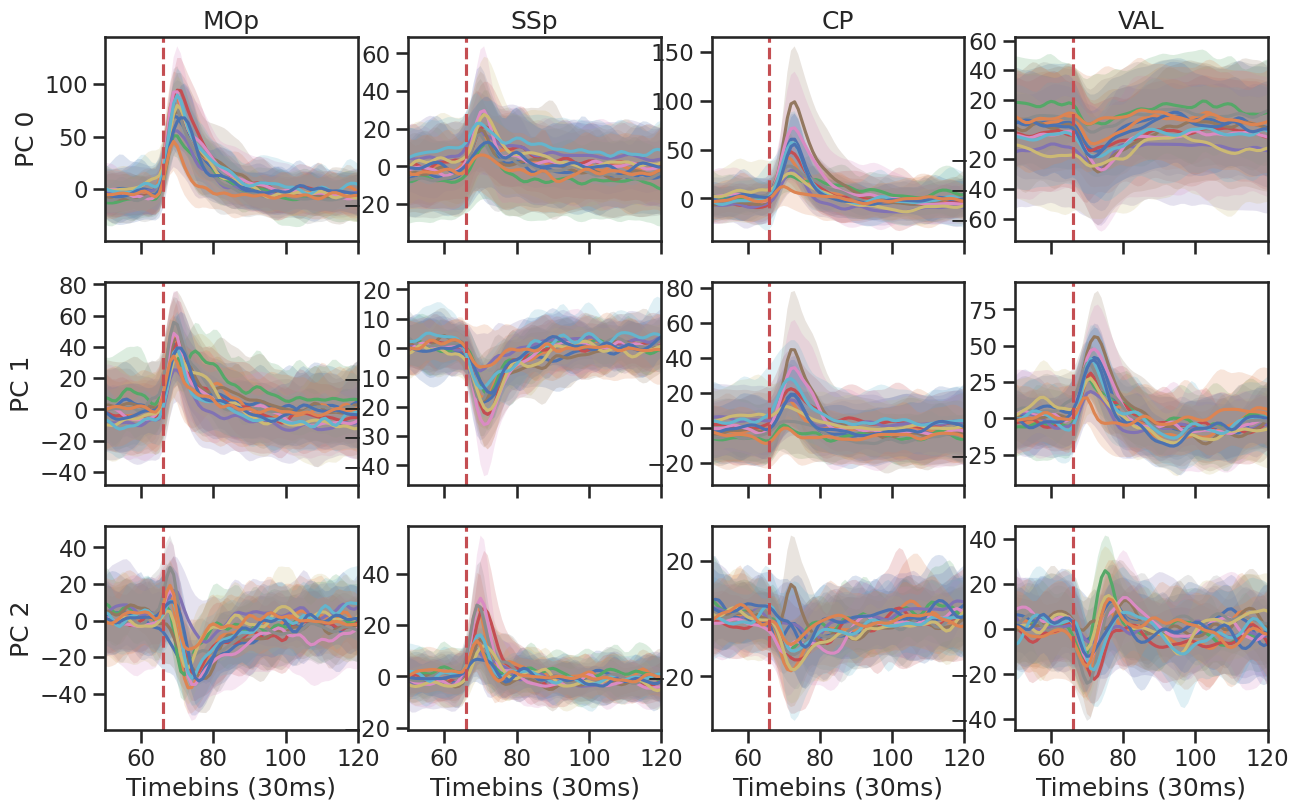

In [29]:
from tools.viz.dimensionality import plot_latents
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

with plt.style.context('seaborn-v0_8-bright'):
    sns.set_theme(context='talk', style='ticks')
    fig, ax = plot_latents(
        df_, 
        areas=["MOp", "SSp", "CP", "VAL"], 
        n_components=3, 
        errorbars=True, 
        errorStat=np.std, 
        show=False,
        figsize=(15, 9)
    )
    ax[-1, -1].set_xlim([50, 120])


figpath = Path('/home/me24/tmp_results')

fig.savefig(figpath / 'latents_1.pdf', bbox_inches='tight')
plt.show()



## 5th March 14:00h

In [9]:
# Files 
data_dir = "/data/bnd-data/raw/M061/M061_2025_03_05_14_00"
fname0 = os.path.join(data_dir, "M061_2025_03_05_14_00_pyaldata_0.mat")
fname1 = os.path.join(data_dir, "M061_2025_03_05_14_00_pyaldata_1.mat")


# Load files
df0 = pyal.mat2dataframe(fname0, shift_idx_fields=True)
df1 = pyal.mat2dataframe(fname1, shift_idx_fields=True)
df = pd.concat([df0, df1], ignore_index=True)

# run_initial_report(df, areas=["MOp", "SSp_ul", "CP", "Thal"])
df_ = preprocess(df, only_trials=False, repair_time_varying_fields=['MotSen1_X', 'MotSen1_Y'])


field values_before_camera_trigger could not be converted to int.
field idx_before_camera_trigger could not be converted to int.
array field SSp_KSLabel could not be converted to int.
array field all_KSLabel could not be converted to int.
array field VAL_KSLabel could not be converted to int.
array field GPe_KSLabel could not be converted to int.
array field MOp_KSLabel could not be converted to int.
array field CP_KSLabel could not be converted to int.
field idx_motion could not be converted to int.
array field SSp_KSLabel could not be converted to int.
array field all_KSLabel could not be converted to int.
array field VAL_KSLabel could not be converted to int.
array field GPe_KSLabel could not be converted to int.
array field MOp_KSLabel could not be converted to int.
array field CP_KSLabel could not be converted to int.
Repairing columns ['MotSen1_X', 'MotSen1_Y']
Extending index to 59999 in trial: free and id: 0, inserting NaN.
Extending index to 99 in trial: intertrial and id: 1, 

/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.12/src/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(
/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.12/src/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(
/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.12/src/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(
/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.12/src/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(
/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.12/src/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assum

Combined every 3 bins
Resulting SSp_spikes ephys data shape is (NxT): (118, 20000)
Resulting all_spikes ephys data shape is (NxT): (24, 20000)
Resulting VAL_spikes ephys data shape is (NxT): (219, 20000)
Resulting GPe_spikes ephys data shape is (NxT): (100, 20000)
Resulting MOp_spikes ephys data shape is (NxT): (155, 20000)
Resulting CP_spikes ephys data shape is (NxT): (195, 20000)


ValueError: x and y must have same first dimension, but have shapes (137723,) and (414496,)

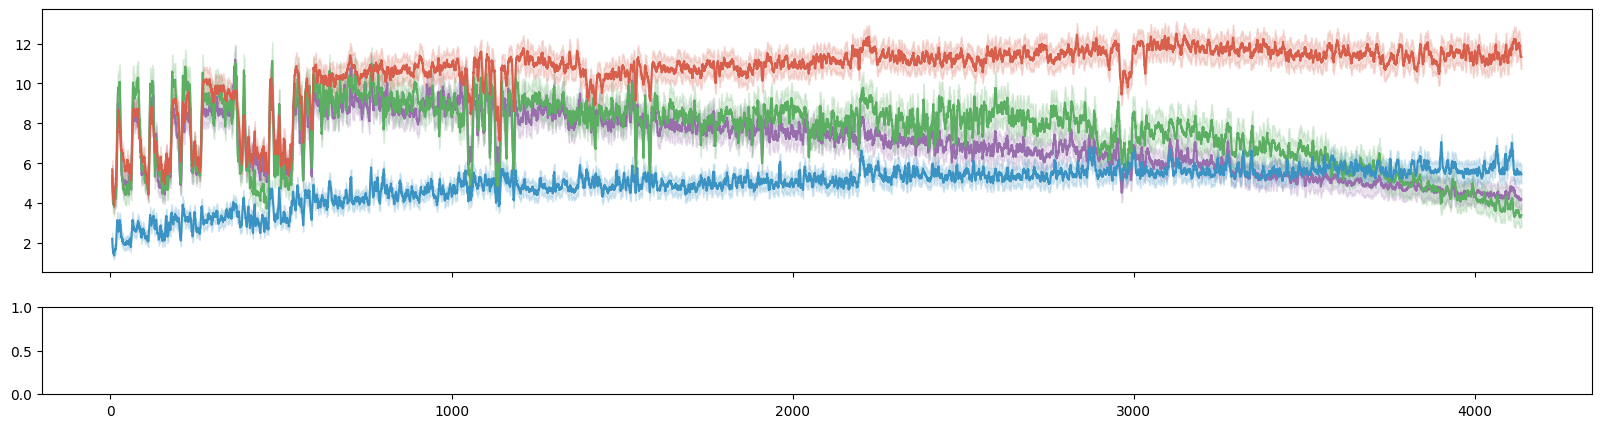

In [10]:
from scipy import stats
from tools import params
from tools.dsp.utils import moving_window_mean
from tools.viz.utilityTools import shaded_errorbar

window = 5  # in seconds
session = 'M061_2025_03_05_14_00'

fig, ax = plt.subplots(2, 1, figsize=(20, 5), sharex='all', gridspec_kw={'height_ratios': [3, 1]})
areas=["MOp", "SSp", "CP", "VAL"]


for area in areas:
    all_rates = np.concatenate(df_[f"{area}_rates"].values, axis=0)
    means, time_bins = moving_window_mean(all_rates, int(window / Params.BIN_SIZE))
    shaded_errorbar(ax[0], x=time_bins * Params.BIN_SIZE, y=means, errorStat=stats.sem, 
                    color=getattr(params.colors, f"{area}_light", "k"),
                    label=area
                    )
    
all_motion_sensor_x = np.concatenate(df_[f"values_MotSen1_X"].values, axis=0)
all_motion_sensor_y = np.concatenate(df_[f"values_MotSen1_Y"].values, axis=0)

motion_sensor_means_x, _ = moving_window_mean(all_motion_sensor_x, int(window / Params.BIN_SIZE))
motion_sensor_means_y, _ = moving_window_mean(all_motion_sensor_y, int(window / Params.BIN_SIZE))

ax[1].plot(time_bins * Params.BIN_SIZE, motion_sensor_means_x, label='x')
ax[1].plot(time_bins * Params.BIN_SIZE, motion_sensor_means_y, label='y')
ax[1].set_ylabel(f'Motion Sensors')
ax[1].legend()


ax[0].set_ylabel(f'Means rate in {window} seconds')
ax[1].set_xlabel(f' Time (s)')
ax[0].axvline(x=480, color="k", linestyle="--")
ax[0].axvline(x=3660, color="k", linestyle="--")
ax[0].set_title(f'Firing rates over time. Session: {session}')
ax[0].legend()


# 6th March

In [13]:
# Files 
session = 'M061_2025_03_06_14_00'
data_dir = f"/data/bnd-data/raw/M061/{session}"

areas=["MOp", "SSp", "CP", "VAL"]
df = pyal.load_pyaldata(data_dir)
df_ = preprocess(df, only_trials=False, repair_time_varying_fields=['MotSen1_X', 'MotSen1_Y'])

field values_before_camera_trigger could not be converted to int.
field idx_before_camera_trigger could not be converted to int.
array field SSp_KSLabel could not be converted to int.
array field VAL_KSLabel could not be converted to int.
array field all_KSLabel could not be converted to int.
array field MOp_KSLabel could not be converted to int.
array field CP_KSLabel could not be converted to int.
array field GPe_KSLabel could not be converted to int.
array field SSp_KSLabel could not be converted to int.
array field VAL_KSLabel could not be converted to int.
array field all_KSLabel could not be converted to int.
array field MOp_KSLabel could not be converted to int.
array field CP_KSLabel could not be converted to int.
array field GPe_KSLabel could not be converted to int.
Repairing columns ['MotSen1_X', 'MotSen1_Y']
Extending index to 53999 in trial: free and id: 668, inserting NaN.
Extending index to 53989 in trial: free and id: 668, inserting NaN.
Extending index to 53990 in tria

/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.12/src/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(
/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.12/src/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(
/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.12/src/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(
/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.12/src/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(
/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.12/src/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assum

Combined every 3 bins
Resulting SSp_spikes ephys data shape is (NxT): (69, 20000)
Resulting VAL_spikes ephys data shape is (NxT): (168, 20000)
Resulting all_spikes ephys data shape is (NxT): (11, 20000)
Resulting MOp_spikes ephys data shape is (NxT): (178, 20000)
Resulting CP_spikes ephys data shape is (NxT): (172, 20000)
Resulting GPe_spikes ephys data shape is (NxT): (120, 20000)


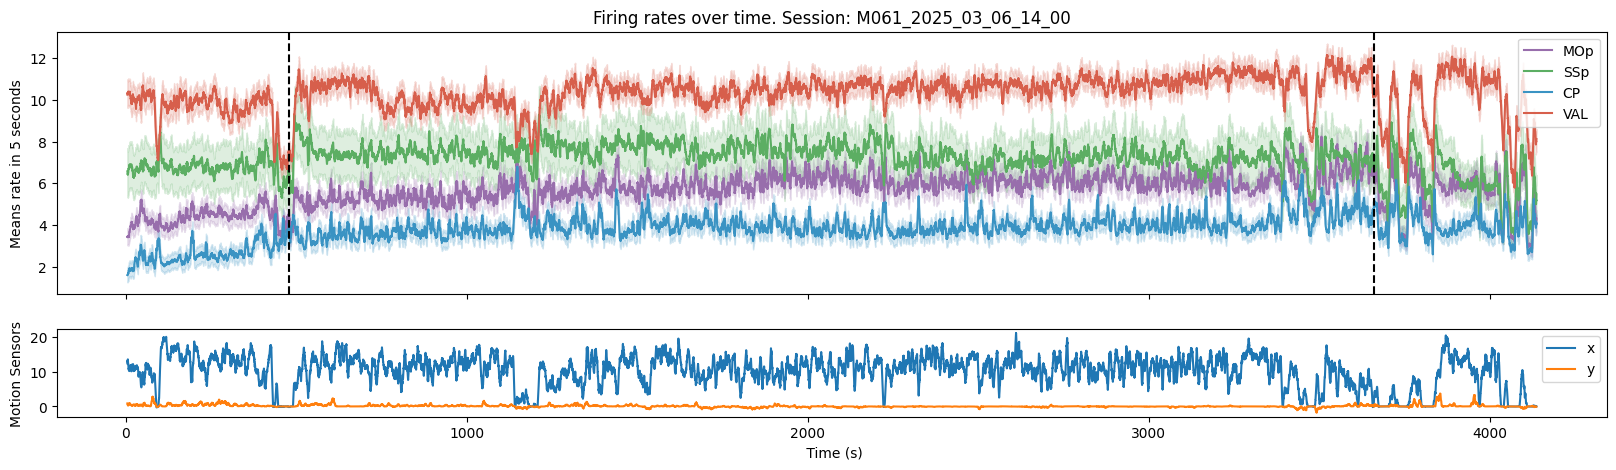

In [14]:
from scipy import stats
from tools import params
from tools.dsp.utils import moving_window_mean
from tools.viz.utilityTools import shaded_errorbar

window = 5  # in seconds

fig, ax = plt.subplots(2, 1, figsize=(20, 5), sharex='all', gridspec_kw={'height_ratios': [3, 1]})
areas=["MOp", "SSp", "CP", "VAL"]


for area in areas:
    all_rates = np.concatenate(df_[f"{area}_rates"].values, axis=0)
    means, time_bins = moving_window_mean(all_rates, int(window / Params.BIN_SIZE))
    shaded_errorbar(ax[0], x=time_bins * Params.BIN_SIZE, y=means, errorStat=stats.sem, 
                    color=getattr(params.colors, f"{area}_light", "k"),
                    label=area
                    )
    
all_motion_sensor_x = np.concatenate(df_[f"values_MotSen1_X"].values, axis=0)
all_motion_sensor_y = np.concatenate(df_[f"values_MotSen1_Y"].values, axis=0)

motion_sensor_means_x, _ = moving_window_mean(all_motion_sensor_x, int(window / Params.BIN_SIZE))
motion_sensor_means_y, _ = moving_window_mean(all_motion_sensor_y, int(window / Params.BIN_SIZE))

ax[1].plot(time_bins * Params.BIN_SIZE, motion_sensor_means_x, label='x')
ax[1].plot(time_bins * Params.BIN_SIZE, motion_sensor_means_y, label='y')
ax[1].set_ylabel(f'Motion Sensors')
ax[1].legend()


ax[0].set_ylabel(f'Means rate in {window} seconds')
ax[1].set_xlabel(f' Time (s)')
ax[0].axvline(x=480, color="k", linestyle="--")
ax[0].axvline(x=3660, color="k", linestyle="--")
ax[0].set_title(f'Firing rates over time. Session: {session}')
ax[0].legend()
